In [ ]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 54.7 MB/s eta 0:00:00


In [ ]:
import fitz
from PIL import Image
import os

# Step 1: Convert PDF to PNG images using fitz
def convert_pdf_to_images(pdf_path, output_folder,book):
    doc = fitz.open(pdf_path)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    image_paths = []
    for page_num in range(5):
        page = doc.load_page(page_num)
        pix = page.get_pixmap()
        image_path = os.path.join(output_folder, f"{book}_page_{page_num + 1}.png")
        pix.save(image_path)
        image_paths.append(image_path)

    doc.close()
    return image_paths


pdf_path1 = "/content/drive/MyDrive/A/Dataset B - different typeface/Constituciones sinodales Calahorra 1602.pdf"
image_folder1 = "/content/image_folder2"
book1 = 'Constituciones sinodales Calahorra 1602'
image_path1 = convert_pdf_to_images(pdf_path1, image_folder1,book1)

image_path = []
image_path.extend(image_path1)
print(image_path)

['/content/image_folder2/Constituciones sinodales Calahorra 1602_page_1.png', '/content/image_folder2/Constituciones sinodales Calahorra 1602_page_2.png', '/content/image_folder2/Constituciones sinodales Calahorra 1602_page_3.png', '/content/image_folder2/Constituciones sinodales Calahorra 1602_page_4.png', '/content/image_folder2/Constituciones sinodales Calahorra 1602_page_5.png']


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import shutil


file_path1 = '/content/drive/MyDrive/A/Dataset B - different typeface/Buendia - Instruccion.pdf'
doc_path1 = '/content/drive/MyDrive/A/Dataset B - different typeface/Buendia transcription.docx'

shutil.copy(file_path1, './Buendia - Instruccion.pdf')
shutil.copy(doc_path1, './Buendia transcription.docx')

'./Buendia transcription.docx'

# UNET


In [ ]:
#Importing required libraries.
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.layers import *
from keras.models import Model
from keras.optimizers import Adam
import random
def unet(pretrained_weights = None,input_size = (512,512,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs,conv10)

    model.compile(optimizer = Adam(learning_rate=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


In [ ]:
# Create the model
model = unet(pretrained_weights=False)

# Load weights
model.load_weights('/content/drive/MyDrive/A/unet.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# A * Line Segmentation

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import os
from skimage.graph import route_through_array
from heapq import heappush, heappop

def heuristic(a, b):
    """Calculate the squared distance between two points."""
    return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2

def get_binary(img):
    """Binarize the image using Otsu's threshold."""
    mean = np.mean(img)
    if mean == 0.0 or mean == 1.0:
        return img

    thresh = threshold_otsu(img)
    binary = img <= thresh
    binary = binary.astype(np.uint8)
    return binary

def astar(array, start, goal):
    """Perform A* algorithm to find a path from start to goal in a binary array."""
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    heappush(oheap, (fscore[start], start))

    while oheap:
        current = heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heappush(oheap, (fscore[neighbor], neighbor))

    return []

def preprocess_image(image_path,target_size):
    """Read and convert an image to grayscale."""
    try:
        img = imread(image_path)
        if target_size is not None:
            img = img[target_size[0]:target_size[1], target_size[2]:target_size[3],:]
        if img.ndim == 3 and img.shape[2] == 4:
            img = img[..., :3]
        if img.ndim > 2:
            img = rgb2gray(img)
        return img
    except FileNotFoundError:
        print(f"Error: File {image_path} not found.")
        return None

def horizontal_projections(sobel_image):
    """Calculate horizontal projections of the binary image."""
    return np.sum(sobel_image, axis=1)

def binarize_image(image):
    """Binarize an image using Otsu's threshold."""
    threshold = threshold_otsu(image)
    return image < threshold

def find_peak_regions(hpp, threshold):
    """Identify peak regions based on the horizontal projection profile."""
    peaks = []
    for i, hppv in enumerate(hpp):
        if hppv < threshold:
            peaks.append(i)
    return peaks

def line_segmentation(image_path, segmented_image_path, segmented_image_folder, threshold=None, min_peak_group_size = 10,target_size=None,ct=0, parent_line_num=None,recursive=False):
    """Segment an image into lines using horizontal projections and A*."""
    img = preprocess_image(image_path,target_size)
    if img is None:
        return

    binarized_image = binarize_image(img)
    hpp = horizontal_projections(binarized_image)

    if threshold == None:
      threshold = (np.max(hpp)-np.min(hpp))/2

    peaks = find_peak_regions(hpp, threshold)

    peaks_indexes = np.array(peaks).astype(int)

    segmented_img = np.copy(img)
    r, c = segmented_img.shape
    for ri in range(r):
        if ri in peaks_indexes:
            segmented_img[ri, :] = 0

    diff_between_consec_numbers = np.diff(peaks_indexes)
    indexes_with_larger_diff = np.where(diff_between_consec_numbers > 1)[0].flatten()
    peak_groups = np.split(peaks_indexes, indexes_with_larger_diff)
    peak_groups = [item for item in peak_groups if len(item) > min_peak_group_size]

    binary_image = get_binary(img)
    segment_separating_lines = []

    for sub_image_index in peak_groups:
        start_row = sub_image_index[0]
        end_row = sub_image_index[-1]

        start_row = max(0, start_row)
        end_row = min(binary_image.shape[0], end_row)

        nmap = binary_image[start_row:end_row, :]

        start_point = (int(nmap.shape[0] / 2), 0)
        end_point = (int(nmap.shape[0] / 2), nmap.shape[1] - 1)

        path, _ = route_through_array(nmap, start_point, end_point)

        path = np.array(path) + start_row

        segment_separating_lines.append(path)

    seperated_images = []

    for index, line_segments in enumerate(segment_separating_lines):
        if index < len(segment_separating_lines) - 1:
            lower_line = np.min(segment_separating_lines[index][:, 0])
            upper_line = np.max(segment_separating_lines[index + 1][:, 0])
            seperated_images.append(img[lower_line:upper_line])

    if not os.path.exists(segmented_image_folder):
        os.makedirs(segmented_image_folder)

    # Initialize count
    count = ct

    image_heights = [line_image.shape[0] for line_image in seperated_images]
    height_threshold = np.percentile(image_heights, 90)

    len_seperated_images = len(seperated_images)

    for index, line_image in enumerate(seperated_images):
        if parent_line_num is None:
            output_path = os.path.join(segmented_image_folder, f'{os.path.basename(segmented_image_path)}_line_{count + 1}.png')
        else:
            output_path = os.path.join(segmented_image_folder, f'{os.path.splitext(os.path.basename(segmented_image_path))[0]}_{count + 1}.png')
            if index < len(seperated_images) - 1:
              continue

        plt.imsave(output_path, line_image, cmap='gray')
        count += 1
        print(f"Saved line image to {output_path}")

        if line_image.shape[0] > height_threshold and not recursive:
            line_segmentation(output_path,output_path, segmented_image_folder,min_peak_group_size = 3 ,parent_line_num=f"{parent_line_num}_{count}" if parent_line_num else count,recursive=True)
            os.remove(output_path)
            print(f"Deleted line image {output_path}")
        elif recursive:
            return



# Deskew

In [ ]:
!pip install deskew

In [ ]:
import math
from typing import Tuple, Union

import cv2
import numpy as np

from deskew import determine_skew


def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

# image = cv2.imread('output.png')
# grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# angle = determine_skew(grayscale)
# rotated = rotate(image, angle, (0, 0, 0))
# cv2.imwrite('rotated.png', rotated)
# plt.imshow(rotated)
# plt.title('Deskew Image')
# plt.axis('off')
# plt.show()

# Image Processing Pipeline Functions

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocessImage(image_path,folder_path):
    """
    Preprocesses an image by applying various image processing steps such as denoising, thresholding,
    and removal of horizontal and vertical lines, and saves the final processed image.

    Args:
    - image_path (str): The file path to the input image to be processed.
    - folder_path (str): The directory where the final processed image will be saved.

    Returns:
    - str: The path of the final processed image.
    """

  # Read the image
  image = cv2.imread(image_path)

  # Convert the image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply denoising
  gray = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)

  # Apply binary thresholding using Otsu's method
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  # Copy the original image to preserve it
  removed = image.copy()

  # Remove vertical lines
  vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))
  remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
  cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  for c in cnts:
      cv2.drawContours(removed, [c], -1, (255, 255, 255), 4)

  # Remove horizontal lines
  horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
  remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
  cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  for c in cnts:
      cv2.drawContours(removed, [c], -1, (255, 255, 255), 5)

  # Repair kernel
  repair_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
  removed = 255 - removed
  dilate = cv2.dilate(removed, repair_kernel, iterations=5)
  dilate = cv2.cvtColor(dilate, cv2.COLOR_BGR2GRAY)
  pre_result = cv2.bitwise_and(dilate, thresh)

  # Final result
  result = cv2.morphologyEx(pre_result, cv2.MORPH_CLOSE, repair_kernel, iterations=5)
  final = cv2.bitwise_and(result, thresh)

  # Invert the final image
  invert_final = 255 - final

  # Plotting each step
  fig, axes = plt.subplots(4, 2, figsize=(15, 20))
  axes = axes.flatten()

  axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axes[0].set_title('Original Image')
  axes[0].axis('off')

  axes[1].imshow(thresh, cmap='gray')
  axes[1].set_title('Threshold Image')
  axes[1].axis('off')

  axes[2].imshow(255 - remove_vertical, cmap='gray')
  axes[2].set_title('Vertical Lines Removed')
  axes[2].axis('off')

  axes[3].imshow(255 - remove_horizontal, cmap='gray')
  axes[3].set_title('Horizontal Lines Removed')
  axes[3].axis('off')

  axes[4].imshow(cv2.cvtColor(removed, cv2.COLOR_BGR2RGB))
  axes[4].set_title('Removed Image')
  axes[4].axis('off')

  axes[5].imshow(dilate, cmap='gray')
  axes[5].set_title('Dilated Image')
  axes[5].axis('off')

  axes[6].imshow(pre_result, cmap='gray')
  axes[6].set_title('Pre Result')
  axes[6].axis('off')

  axes[7].imshow(invert_final, cmap='gray')
  axes[7].set_title('Inverted Final')
  axes[7].axis('off')

  plt.tight_layout()
  plt.show()

  processed_image_path = os.path.join(folder_path, f"{os.path.splitext(os.path.basename(image_path))[0]}-preprocessed.png")
  # Save the final image
  cv2.imwrite(processed_image_path, invert_final)
  return processed_image_path

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_segment_and_crop_image(model, img_path, preprocess_image_path, output_folder, padding=10, min_contour_area=100):
    """
    Processes an image for segmentation using a U-Net model and crops the original image based on the largest contour.

    Args:
    - model (tf.keras.Model): Trained U-Net model for image segmentation.
    - img_path (str): Path to the original image.
    - preprocess_image_path (str): Path to the preprocessed image.
    - output_folder (str): Folder to save the cropped image.
    - padding (int): Padding around the detected region.
    - min_contour_area (int): Minimum contour area to be considered for cropping.

    Returns:
    - str: The path of the cropped image.
    """
    # Read the original image in grayscale
    img = cv2.imread(preprocess_image_path, 0)

    # Apply thresholding to create a binary image
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

    # Resize the image to the model input size (512x512)
    img = cv2.resize(img, (512, 512))

    # Expand dimensions to match model input
    img = np.expand_dims(img, axis=-1)
    img_np = np.expand_dims(img, axis=0)

    # Predict the segmentation mask using the U-Net model
    pred = model.predict(img_np)
    pred = np.squeeze(np.squeeze(pred, axis=0), axis=-1)

    # Display the segmentation result
    plt.imshow(pred, cmap='gray')
    plt.title('U-Net Segmentation')
    plt.axis('off')
    plt.show()

    # Read the original image
    original_img = cv2.imread(preprocess_image_path)

    # Get original dimensions
    ori_height, ori_width = original_img.shape[:2]

    # Resize the mask to match the original image dimensions
    resized_mask = cv2.resize(pred, (ori_width, ori_height))

    # Convert the resized mask to 8-bit unsigned integer type
    resized_mask = (resized_mask * 255).astype(np.uint8)

    # Apply Otsu's threshold to get a binary image
    _, binary_mask = cv2.threshold(resized_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations to remove noise and connect nearby text
    kernel = np.ones((5, 5), np.uint8)
    cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel)

    # Find contours in the cleaned mask
    contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to remove small noise
    valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    if not valid_contours:
        print("No valid text regions found.")
        return None

    # Find the bounding rectangle that encompasses all valid contours
    x_min, y_min = ori_width, ori_height
    x_max, y_max = 0, 0

    for contour in valid_contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w)
        y_max = max(y_max, y + h)

    x_min = max(0, x_min - padding)
    y_min = max(0, y_min - padding)
    x_max = min(ori_width, x_max + padding)
    y_max = min(ori_height, y_max + padding)

    # Crop the original image
    cropped_img = original_img[y_min:y_max, x_min:x_max]

    # Create output path
    output_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(img_path))[0]}-cropped.png")

    # Save the cropped image
    cv2.imwrite(output_path, cropped_img)

    return output_path

In [ ]:
import math
from typing import Tuple, Union
import cv2
import numpy as np
from deskew import determine_skew
import matplotlib.pyplot as plt

def postProcessImage(image_path, cropped_image_path,output_folder):
    """
    Post-processes an image by deskewing, sharpening, and applying morphological dilation, then saves the final processed image.

    Args:
    - image_path (str): Path to the original image.
    - cropped_image_path (str): Path to the cropped image to be post-processed.
    - output_folder (str): Directory where the final post-processed image will be saved.

    Returns:
    - str: The path of the final post-processed image.
    """
    # Load the image
    image = cv2.imread(cropped_image_path)

    # Deskew Image
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    angle = determine_skew(grayscale)
    rotated = rotate(image, angle, (0, 0, 0))
    # rotated = grayscale

    # Sharpening (reduced intensity)
    blurred = cv2.GaussianBlur(rotated, (1,1), sigmaX=3, sigmaY=3)
    sharpened = cv2.addWeighted(rotated, 1.5, blurred, -0.5, 0)

    # Morphological dilation to thicken the text
    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    dilated = cv2.dilate(sharpened, dilate_kernel, iterations=1)

    output_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(image_path))[0]}-postprocessed.png")
    cv2.imwrite(output_path, sharpened)

    return output_path

In [ ]:
# Main

In [ ]:
import fitz
from PIL import Image
import os

def convert_pdf_to_images(pdf_path, output_folder,book):
    doc = fitz.open(pdf_path)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    image_paths = []
    for page_num in range(0,1):
        page = doc.load_page(page_num)
        pix = page.get_pixmap()
        image_path = os.path.join(output_folder, f"{book}_page_{page_num + 1}.png")
        pix.save(image_path)
        image_paths.append(image_path)

    doc.close()
    return image_paths


pdf_path1 = "/content/drive/MyDrive/A/Dataset B - different typeface/Paredes - Reglas generales.pdf"
image_folder1 = "/content/image_folder1"
book1 = 'Paredes - Reglas generales'
image_path1 = convert_pdf_to_images(pdf_path1, image_folder1,book1)

image_path = []
image_path.extend(image_path1)
print(image_path)

['/content/image_folder1/Paredes - Reglas generales_page_1.png']


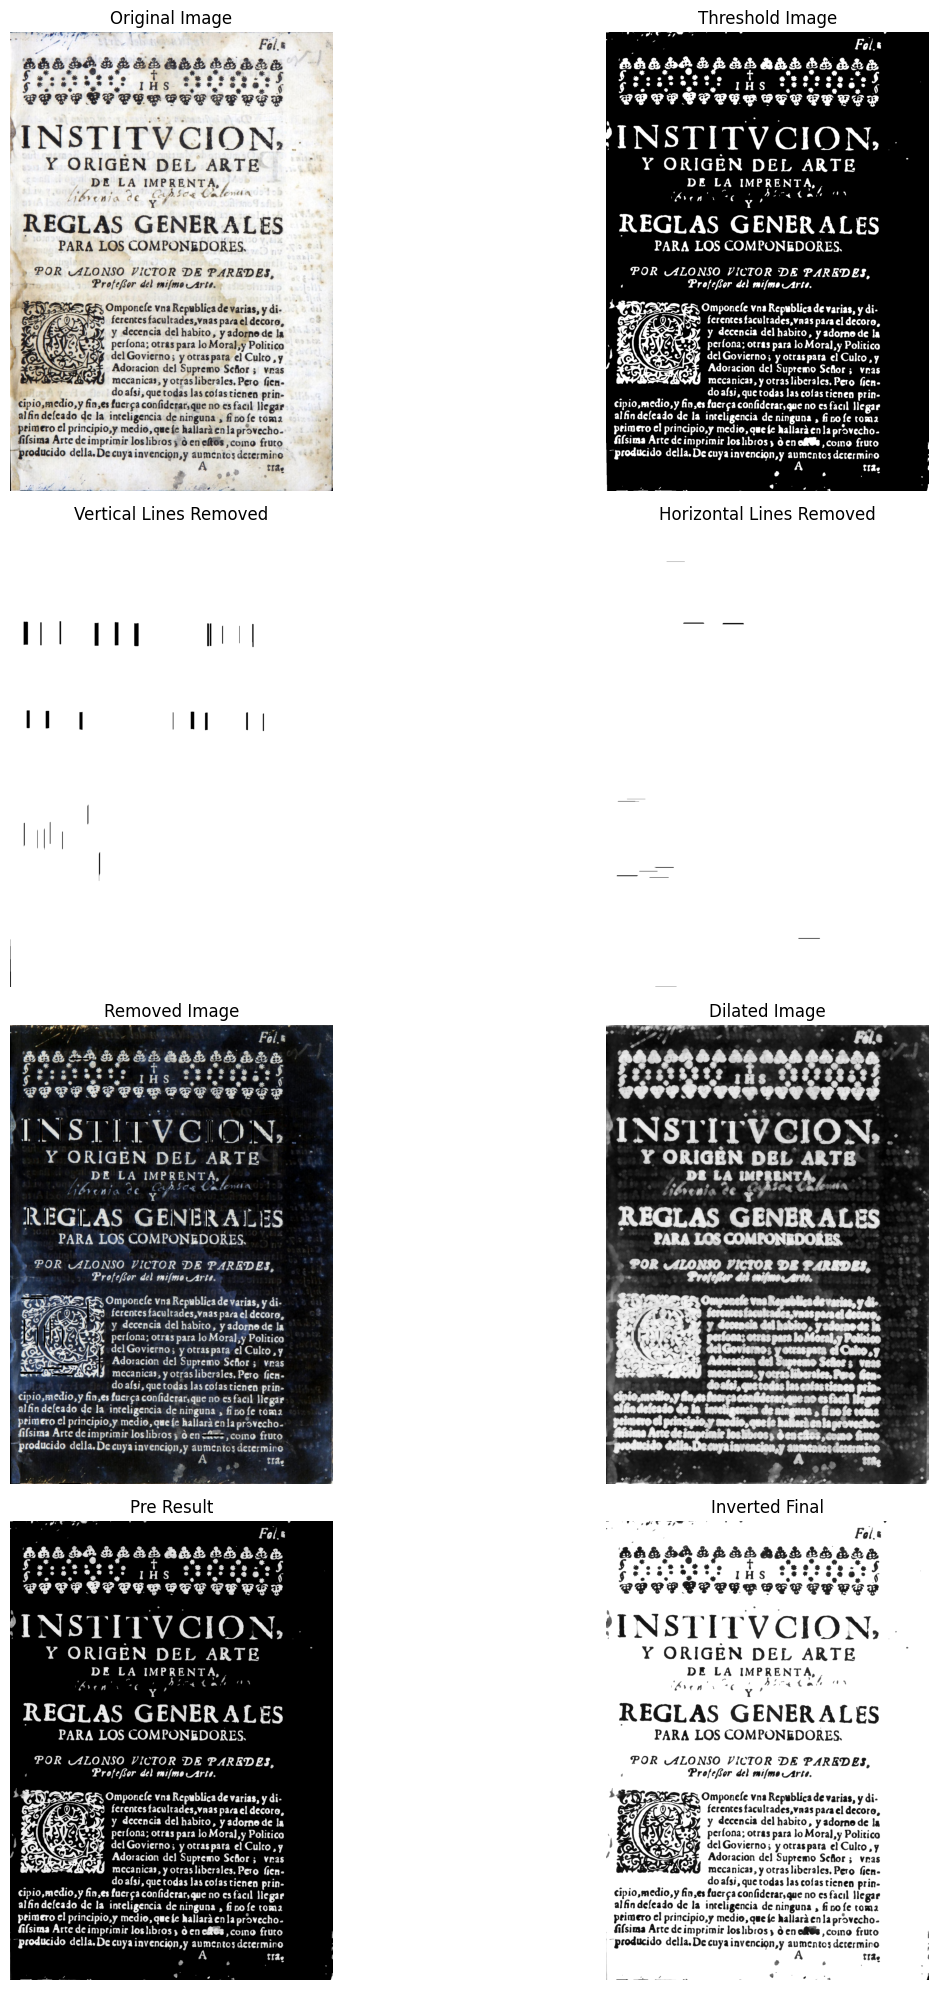

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


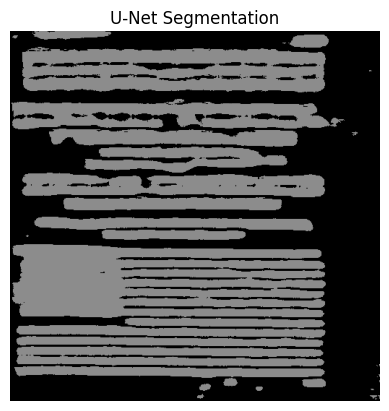

Saved line image to /content/Paredes - Reglas generales_test/Paredes - Reglas generales_page_1.png_line_1.png
Deleted line image /content/Paredes - Reglas generales_test/Paredes - Reglas generales_page_1.png_line_1.png
Saved line image to /content/Paredes - Reglas generales_test/Paredes - Reglas generales_page_1.png_line_2.png
Deleted line image /content/Paredes - Reglas generales_test/Paredes - Reglas generales_page_1.png_line_2.png
Saved line image to /content/Paredes - Reglas generales_test/Paredes - Reglas generales_page_1.png_line_3.png
Deleted line image /content/Paredes - Reglas generales_test/Paredes - Reglas generales_page_1.png_line_3.png
Saved line image to /content/Paredes - Reglas generales_test/Paredes - Reglas generales_page_1.png_line_4.png
Deleted line image /content/Paredes - Reglas generales_test/Paredes - Reglas generales_page_1.png_line_4.png
Saved line image to /content/Paredes - Reglas generales_test/Paredes - Reglas generales_page_1.png_line_5.png
Saved line ima

NameError: name 'get_segmented_image_paths' is not defined

In [ ]:
pre_process_folder = '/content/preprocess'
crop_folder = '/content/cropped'
segmentation_folder = f'/content/{book1}_test'

if not os.path.exists(pre_process_folder):
    os.makedirs(pre_process_folder)

if not os.path.exists(crop_folder):
    os.makedirs(crop_folder)

if not os.path.exists(segmentation_folder):
    os.makedirs(segmentation_folder)


for img_path in image_path:
    preprocess_image_path = preprocessImage(img_path,pre_process_folder)
    cropped_image_path = process_segment_and_crop_image(model,img_path, preprocess_image_path,crop_folder)
    post_process_image_path = postProcessImage(img_path,cropped_image_path,crop_folder)

    line_segmentation(post_process_image_path,img_path,segmentation_folder,threshold=300,line=3,ct=0)

    # Get sorted image paths
    image_paths = get_segmented_image_paths(img_path, segmentation_folder)
    sorted_image_paths = sort_segmented_image_paths(image_paths)

    # Read images from directory and store them in a list
    seperated_images = []
    for image_path in sorted_image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            seperated_images.append(image)

    # Create a subplot for each image and display them
    fig, ax = plt.subplots(figsize=(5, 5), nrows=len(seperated_images))

    for index, line_image in enumerate(seperated_images):
        print(f"{sorted_image_paths[index]}: {line_image.shape}")
        ax[index].imshow(line_image, cmap="gray")
        ax[index].axis('off')  # Hide axes

    plt.axis('off')
    plt.show()

    print("*****************************************************************")



In [ ]:
import os
import re
import matplotlib.pyplot as plt
import cv2

def get_segmented_image_paths(input_path, segmented_image_dir):
    # Get the base name from the input path
    base_name = os.path.basename(input_path)

    # List all files in the directory
    files = os.listdir(segmented_image_dir)

    # Filter the files to get only those that start with the base name and end with "_line_*.png"
    segmented_files = [os.path.join(segmented_image_dir, f) for f in files if f.startswith(base_name) and "_line_" in f and f.endswith(".png")]

    return segmented_files

def extract_line_number(file_path):
    # Extract the line number(s) from the file name using regex
    match = re.search(r'_line_(\d+(_\d+)?).png$', file_path)
    if match:
        return list(map(int, match.group(1).split('_')))
    return [-1]

def sort_segmented_image_paths(image_paths):
    # Sort the list of paths based on the extracted line number
    sorted_paths = sorted(image_paths, key=extract_line_number)
    return sorted_paths

